# Passo 1: Preparando o ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC
import matplotlib.colors as mcolors
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [2]:
df:pd.DataFrame = pd.read_excel("Dry_Bean_Dataset.xlsx")

# Passo 2: Pré-processamento dos Dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


<Axes: >

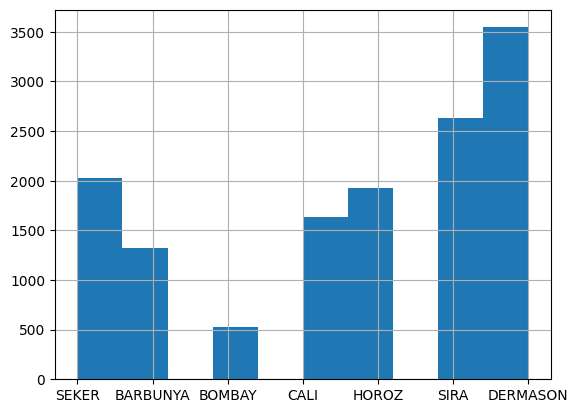

In [6]:
df.Class.hist()

## Dividindo o Dataset

O dataset foi dividido em 60% treino e 40% teste

In [7]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [8]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Passo 3: Definição dos Modelos

## Árvore de decisão

In [10]:
decision_tree_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "min_samples_split": [2, 0.3, 0.6, 0.9, 3],
    "max_leaf_nodes": [None, len(df.columns)],
    "splitter": ["best", "random"]
}

## SVM

In [11]:
svm_params = {
    "kernel": ["linear", "rbf"],
    "degree": [2, 3, 4, 5],
    "tol": [1e-3, 1e-2, 1e-1],
    "gamma": ["scale", "auto"]
}

## MLP

In [12]:
mlp_paramns = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'hidden_layer_sizes': [(1,),(5,),(10,),(15,),(20,),(21,)]
}

# Passo 4: Busca por Parâmetros

## Decision Tree

In [13]:
decision_tree = DecisionTreeClassifier()

In [14]:
decision_tree_searcher = RandomizedSearchCV(decision_tree, decision_tree_params, random_state=24, n_jobs=-1, verbose=2, error_score='raise', scoring="accuracy")

In [15]:
decision_tree_best = decision_tree_searcher.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END criterion=log_loss, max_leaf_nodes=None, min_samples_split=0.9, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_leaf_nodes=17, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=log_loss, max_leaf_nodes=None, min_samples_split=0.9, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_leaf_nodes=None, min_samples_split=0.9, splitter=best; total time=   0.1s
[CV] END criterion=log_loss, max_leaf_nodes=None, min_samples_split=0.9, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_leaf_nodes=None, min_samples_split=0.9, splitter=best; total time=   0.0s
[CV] END criterion=log_loss, max_leaf_nodes=17, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_leaf_nodes=17, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_leaf_nodes=17, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_leaf_nodes=17, 

In [16]:
decision_tree_best.best_params_

{'splitter': 'random',
 'min_samples_split': 3,
 'max_leaf_nodes': 17,
 'criterion': 'gini'}

In [17]:
decision_tree_best.best_score_

0.8721521615457206

In [18]:
print(classification_report(y_test, decision_tree_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.64      0.82      0.72       538
      BOMBAY       1.00      0.98      0.99       203
        CALI       0.88      0.63      0.74       645
    DERMASON       0.88      0.92      0.90      1427
       HOROZ       0.95      0.94      0.95       759
       SEKER       0.93      0.92      0.92       809
        SIRA       0.85      0.83      0.84      1064

    accuracy                           0.87      5445
   macro avg       0.88      0.86      0.87      5445
weighted avg       0.87      0.87      0.86      5445



In [19]:
decision_tree_grid_searcher = GridSearchCV(decision_tree, decision_tree_params, n_jobs=-1, verbose=2, error_score='raise', scoring="accuracy")

In [20]:
decision_tree_grid_best = decision_tree_grid_searcher.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[CV] END criterion=gini, max_leaf_nodes=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_leaf_nodes=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_leaf_nodes=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_leaf_nodes=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_leaf_nodes=None, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_leaf_nodes=None, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_leaf_nodes=None, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_leaf_nodes=None, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_leaf_nodes=None, min_samples_split=0.3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_leaf_nodes=None, min_samples_split=2, splitter=bes

In [21]:
decision_tree_grid_best.best_params_

{'criterion': 'log_loss',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'splitter': 'best'}

In [22]:
decision_tree_grid_best.best_score_

0.8943169527515795

In [23]:
print(classification_report(y_test, decision_tree_grid_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.88      0.87       538
      BOMBAY       1.00      1.00      1.00       203
        CALI       0.89      0.90      0.90       645
    DERMASON       0.90      0.89      0.89      1427
       HOROZ       0.93      0.94      0.93       759
       SEKER       0.93      0.93      0.93       809
        SIRA       0.84      0.84      0.84      1064

    accuracy                           0.90      5445
   macro avg       0.91      0.91      0.91      5445
weighted avg       0.90      0.90      0.90      5445



## SVM

In [24]:
svm = SVC()

In [25]:
svm_searcher = RandomizedSearchCV(svm, svm_params, random_state=42, n_jobs=-1, verbose=2, error_score='raise', cv = 3, scoring="accuracy")

In [26]:
svm_best = svm_searcher.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......degree=4, gamma=scale, kernel=linear, tol=0.1; total time=   0.2s
[CV] END .......degree=4, gamma=scale, kernel=rbf, tol=0.001; total time=   0.3s
[CV] END ......degree=4, gamma=scale, kernel=linear, tol=0.1; total time=   0.2s
[CV] END .......degree=4, gamma=scale, kernel=rbf, tol=0.001; total time=   0.3s
[CV] END .......degree=4, gamma=scale, kernel=rbf, tol=0.001; total time=   0.3s
[CV] END ........degree=5, gamma=scale, kernel=rbf, tol=0.01; total time=   0.3s
[CV] END ......degree=4, gamma=scale, kernel=linear, tol=0.1; total time=   0.1s
[CV] END ........degree=5, gamma=scale, kernel=rbf, tol=0.01; total time=   0.3s
[CV] END ........degree=5, gamma=scale, kernel=rbf, tol=0.01; total time=   0.4s
[CV] END ......degree=5, gamma=auto, kernel=linear, tol=0.01; total time=   0.1s
[CV] END ......degree=5, gamma=auto, kernel=linear, tol=0.01; total time=   0.2s
[CV] END ......degree=5, gamma=auto, kernel=line

In [27]:
svm_best.best_params_

{'tol': 0.001, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 4}

In [28]:
svm_best.best_score_

0.9241978937056086

In [29]:
print(classification_report(y_test, svm_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.94       538
      BOMBAY       1.00      1.00      1.00       203
        CALI       0.94      0.95      0.94       645
    DERMASON       0.93      0.92      0.93      1427
       HOROZ       0.97      0.96      0.97       759
       SEKER       0.96      0.95      0.95       809
        SIRA       0.87      0.91      0.89      1064

    accuracy                           0.93      5445
   macro avg       0.95      0.94      0.95      5445
weighted avg       0.93      0.93      0.93      5445



In [30]:
svm_grid_searcher = GridSearchCV(svm, svm_params, n_jobs=-1, verbose=2, error_score='raise', cv=3, scoring="accuracy")

In [31]:
svm_grid_best = svm_grid_searcher.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ....degree=2, gamma=scale, kernel=linear, tol=0.001; total time=   0.2s
[CV] END .....degree=2, gamma=scale, kernel=linear, tol=0.01; total time=   0.2s
[CV] END ......degree=2, gamma=scale, kernel=linear, tol=0.1; total time=   0.1s
[CV] END ....degree=2, gamma=scale, kernel=linear, tol=0.001; total time=   0.2s
[CV] END .....degree=2, gamma=scale, kernel=linear, tol=0.01; total time=   0.2s
[CV] END ....degree=2, gamma=scale, kernel=linear, tol=0.001; total time=   0.2s
[CV] END .....degree=2, gamma=scale, kernel=linear, tol=0.01; total time=   0.2s
[CV] END ......degree=2, gamma=scale, kernel=linear, tol=0.1; total time=   0.2s
[CV] END ......degree=2, gamma=scale, kernel=linear, tol=0.1; total time=   0.1s
[CV] END ........degree=2, gamma=scale, kernel=rbf, tol=0.01; total time=   0.3s
[CV] END ........degree=2, gamma=scale, kernel=rbf, tol=0.01; total time=   0.3s
[CV] END .......degree=2, gamma=scale, kernel=r

In [32]:
svm_grid_best.best_params_

{'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.1}

In [33]:
svm_grid_best.best_score_

0.9244428116580945

In [34]:
print(classification_report(y_test, svm_grid_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.92      0.94       538
      BOMBAY       1.00      1.00      1.00       203
        CALI       0.94      0.95      0.94       645
    DERMASON       0.93      0.92      0.93      1427
       HOROZ       0.97      0.96      0.96       759
       SEKER       0.96      0.95      0.95       809
        SIRA       0.87      0.91      0.89      1064

    accuracy                           0.93      5445
   macro avg       0.95      0.94      0.95      5445
weighted avg       0.94      0.93      0.93      5445



## MLP

In [35]:
mlp = MLPClassifier()

In [36]:
mlp_searcher = RandomizedSearchCV(mlp, mlp_paramns, random_state=42, n_jobs=-1, verbose=2, cv=3, scoring="accuracy")

In [37]:
mlp_best = mlp_searcher.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, hidden_layer_sizes=(1,), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(1,), solver=lbfgs; total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

[CV] END activation=identity, hidden_layer_sizes=(1,), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(1,), solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=(5,), solver=sgd; total time=   0.7s
[CV] END activation=identity, hidden_layer_sizes=(5,), solver=sgd; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=(5,), solver=sgd; total time=   0.8s


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

[CV] END activation=identity, hidden_layer_sizes=(1,), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(10,), solver=adam; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=(1,), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(10,), solver=adam; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(10,), solver=adam; total time=   1.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

[CV] END activation=logistic, hidden_layer_sizes=(15,), solver=sgd; total time=   1.0s
[CV] END activation=logistic, hidden_layer_sizes=(15,), solver=sgd; total time=   1.0s
[CV] END activation=logistic, hidden_layer_sizes=(15,), solver=sgd; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=(15,), solver=sgd; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=(15,), solver=sgd; total time=   0.9s


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(20,), solver=adam; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(20,), solver=adam; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(20,), solver=adam; total time=   1.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[CV] END activation=identity, hidden_layer_sizes=(20,), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(1,), solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=(20,), solver=lbfgs; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=(20,), solver=lbfgs; total time=   0.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = 

[CV] END activation=identity, hidden_layer_sizes=(15,), solver=sgd; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(1,), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(1,), solver=lbfgs; total time=   0.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(21,), solver=sgd; total time=   1.0s
[CV] END activation=logistic, hidden_layer_sizes=(21,), solver=sgd; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=(21,), solver=sgd; total time=   1.0s


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
mlp_best.best_params_

{'solver': 'adam', 'hidden_layer_sizes': (20,), 'activation': 'tanh'}

In [39]:
mlp_best.best_score_

0.9254224834680382

In [40]:
print(classification_report(y_test, mlp_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.94      0.94       538
      BOMBAY       1.00      1.00      1.00       203
        CALI       0.95      0.95      0.95       645
    DERMASON       0.93      0.93      0.93      1427
       HOROZ       0.97      0.96      0.96       759
       SEKER       0.96      0.95      0.95       809
        SIRA       0.88      0.90      0.89      1064

    accuracy                           0.93      5445
   macro avg       0.95      0.94      0.95      5445
weighted avg       0.94      0.93      0.93      5445



In [41]:
mlp_grid_searcher = GridSearchCV(mlp, mlp_paramns, n_jobs=-1, cv=5, scoring="accuracy")

In [42]:
mlp_grid_best = mlp_grid_searcher.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

In [43]:
mlp_grid_best.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (21,), 'solver': 'lbfgs'}

In [44]:
mlp_grid_best.best_score_

0.9276268756169609

In [45]:
print(classification_report(y_test, mlp_grid_best.predict(X_test)))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.94      0.94       538
      BOMBAY       1.00      1.00      1.00       203
        CALI       0.95      0.95      0.95       645
    DERMASON       0.93      0.93      0.93      1427
       HOROZ       0.97      0.95      0.96       759
       SEKER       0.95      0.95      0.95       809
        SIRA       0.89      0.90      0.89      1064

    accuracy                           0.93      5445
   macro avg       0.95      0.94      0.95      5445
weighted avg       0.94      0.93      0.93      5445



# Passo 5: Avaliação dos modelos

Primeiramente irei definir algumas funções para ajudar na visualização das diferenças de performance entre os modelos e as técnicas

In [46]:
def create_scatter_plot(X:list[str], y:list[list], title_metric:str="") -> None:
    _, ax = plt.subplots()
    ax.scatter(X, y[0], marker='o')
    ax.scatter(X, y[1], marker='^')
    ax.legend(["Randomized Search", "Grid Search"])
    ax.grid(True)
    ax.set_title(f"Comparação da métrica {title_metric}")
    plt.show()

In [47]:
def print_metrics(metric_vet:list, metric_name:str):
    met1 = "Randomized Search"
    met2 = "Grid Search"
    spaces = " "*20
    methods = ["Decision tree", "SVM", "MLP"]
    print(f"{metric_name:-^60}")
    print(f"{spaces}{met1: ^18} | {met2: ^18}")
    for idx, it in enumerate(methods):
        print(f"{it: ^19} {metric_vet[0][idx]: ^18} | {metric_vet[1][idx]: ^18}")

## Acurácia

In [48]:
x_axis = ["Decision tree", "SVM", "MLP"]
y_axis = [
    [
        accuracy_score(y_test, decision_tree_best.predict(X_test)),
        accuracy_score(y_test, svm_best.predict(X_test)),
        accuracy_score(y_test, mlp_best.predict(X_test))
    ], [
        accuracy_score(y_test, decision_tree_grid_best.predict(X_test)),
        accuracy_score(y_test, svm_grid_best.predict(X_test)),
        accuracy_score(y_test, mlp_grid_best.predict(X_test))
    ]
]

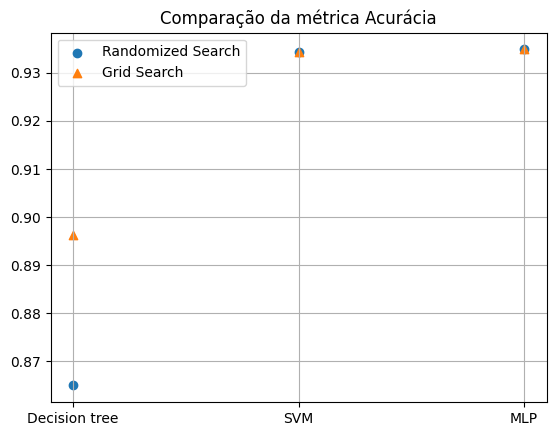

In [49]:
create_scatter_plot(x_axis, y_axis, "Acurácia")

In [50]:
print_metrics(y_axis, " Acurácia ")

------------------------- Acurácia -------------------------
                    Randomized Search  |    Grid Search    
   Decision tree    0.8650137741046832 | 0.8962350780532599
        SVM         0.9342516069788797 | 0.9342516069788797
        MLP         0.9348025711662076 | 0.9348025711662076


Analisando os resultados, vimos que só obtemos diferenças relevantes entre o Ran

## Precisão 

Como vimos nas análises acima, as classes do dataset não são igualmente distribuídas, logo será utilizado a versão "weighted" da precisão, para levar em conta o não balanceamento dos dados.

In [51]:
x_axis = ["Decision tree", "SVM", "MLP"]
y_axis = [
    [
        precision_score(y_test, decision_tree_best.predict(X_test), average="weighted"),
        precision_score(y_test, svm_best.predict(X_test), average="weighted"),
        precision_score(y_test, mlp_best.predict(X_test), average="weighted")
    ], [
        precision_score(y_test, decision_tree_grid_best.predict(X_test), average="weighted"),
        precision_score(y_test, svm_grid_best.predict(X_test), average="weighted"),
        precision_score(y_test, mlp_grid_best.predict(X_test), average="weighted")
    ]
]

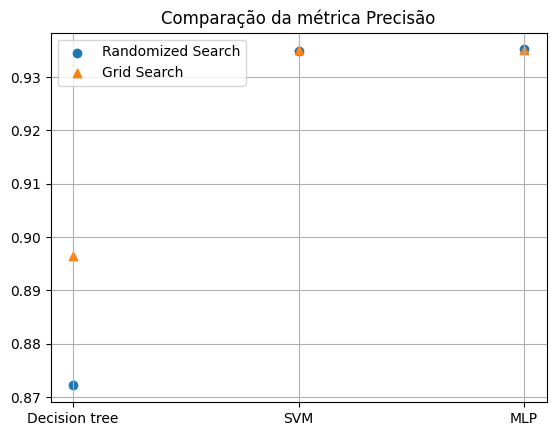

In [52]:
create_scatter_plot(x_axis, y_axis, "Precisão")

In [53]:
print_metrics(y_axis, " Precisão ")

------------------------- Precisão -------------------------
                    Randomized Search  |    Grid Search    
   Decision tree    0.8721750210367845 | 0.8963633009492011
        SVM         0.9349597685311677 | 0.935081839617024 
        MLP         0.9351758557574794 | 0.935069565916038 


## Recall

In [54]:
x_axis = ["Decision tree", "SVM", "MLP"]
y_axis = [
    [
        recall_score(y_test, decision_tree_best.predict(X_test), average="weighted"),
        recall_score(y_test, svm_best.predict(X_test), average="weighted"),
        recall_score(y_test, mlp_best.predict(X_test), average="weighted")
    ], [
        recall_score(y_test, decision_tree_grid_best.predict(X_test), average="weighted"),
        recall_score(y_test, svm_grid_best.predict(X_test), average="weighted"),
        recall_score(y_test, mlp_grid_best.predict(X_test), average="weighted")
    ]
]

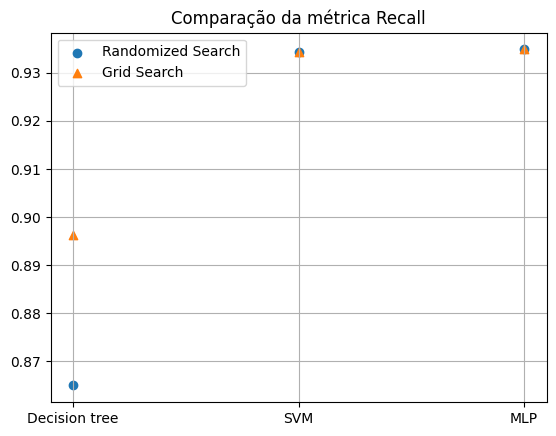

In [55]:
create_scatter_plot(x_axis, y_axis, "Recall")

In [56]:
print_metrics(y_axis, " Recall ")

-------------------------- Recall --------------------------
                    Randomized Search  |    Grid Search    
   Decision tree    0.8650137741046832 | 0.8962350780532599
        SVM         0.9342516069788797 | 0.9342516069788797
        MLP         0.9348025711662076 | 0.9348025711662076


## F1_score

In [57]:
x_axis = ["Decision tree", "SVM", "MLP"]
y_axis = [
    [
        f1_score(y_test, decision_tree_best.predict(X_test), average="weighted"),
        f1_score(y_test, svm_best.predict(X_test), average="weighted"),
        f1_score(y_test, mlp_best.predict(X_test), average="weighted")
    ], [
        f1_score(y_test, decision_tree_grid_best.predict(X_test), average="weighted"),
        f1_score(y_test, svm_grid_best.predict(X_test), average="weighted"),
        f1_score(y_test, mlp_grid_best.predict(X_test), average="weighted")
    ]
]

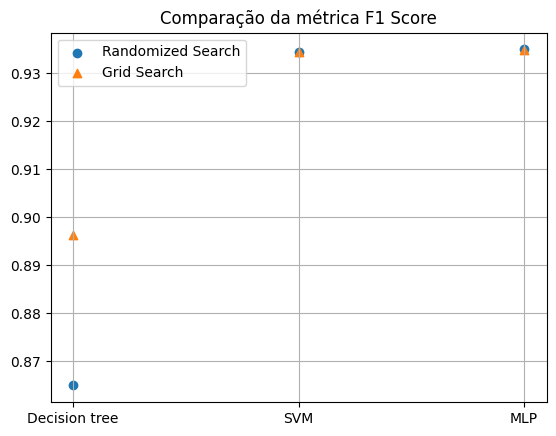

In [58]:
create_scatter_plot(x_axis, y_axis, "F1 Score")

In [59]:
print_metrics(y_axis, " F1 Score ")

------------------------- F1 Score -------------------------
                    Randomized Search  |    Grid Search    
   Decision tree    0.8649120923102375 | 0.8962839738119617
        SVM         0.9344786324177001 | 0.9345125196375182
        MLP         0.9349496318048534 | 0.9349049738647801
